# Агломеративная кластеризация. Практика

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

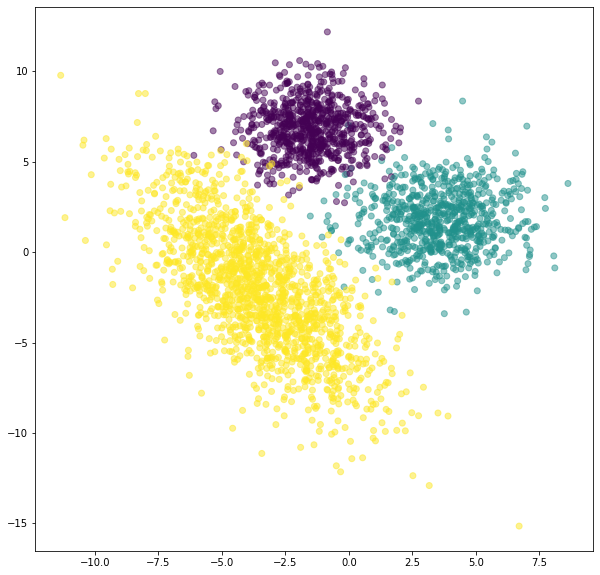

In [5]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

Посмотрим распределение классов в датасете:

In [5]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

В дальнейшем в задачах с использованием этого датасета при использовании переменных X и y считать, что эти переменные содержат признаки объектов и классы объектов датасета соответственно.

Объект, который выполняет кластеризацию датасета инициализруется так: 

In [1]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering()

В отличие от *k-means*, *AgglomerativeClustering* не имеет параметра `random_state`.

In [2]:
AgglomerativeClustering?

Init signature:
AgglomerativeClustering(
    n_clusters=2,
    *,
    affinity='euclidean',
    memory=None,
    connectivity=None,
    compute_full_tree='auto',
    linkage='ward',
    distance_threshold=None,
)
Docstring:     
Agglomerative Clustering

Recursively merges the pair of clusters that minimally increases
a given linkage distance.

Read more in the :ref:`User Guide <hierarchical_clustering>`.

Parameters
----------
n_clusters : int or None, default=2
    The number of clusters to find. It must be ``None`` if
    ``distance_threshold`` is not ``None``.

affinity : str or callable, default='euclidean'
    Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
    "manhattan", "cosine", or "precomputed".
    If linkage is "ward", only "euclidean" is accepted.
    If "precomputed", a distance matrix (instead of a similarity matrix)
    is needed as input for the fit method.

memory : str or object with the joblib.Memory interface, default=None
    Used to cache th

## Задание 7.1

Обучите модель *AgglomerativeClustering* с параметром `n_clusters=3` на признаках исходного датасета. Напишите число листьев в иерархическом дереве, полученном при обучении:

In [6]:
ag = AgglomerativeClustering(n_clusters=3)
ag.fit(X)

AgglomerativeClustering(n_clusters=3)

In [9]:
ag.n_leaves_

3000

## Задание 7.2

Подсчитайте количество элементов в каждом из получившихся кластеров.

Для подсчёта элементов в списке можно воспользоваться функцией `numpy.unique` с параметром `return_counts=True`:

```py
import numpy as np
a = [0, 0, 0, 1, 1, 2]
_, counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')
# Вывод
3 2 1
```

In [10]:
u, counts = np.unique(ag.labels_, return_counts=True)

for count in counts:
    print(count, end=' ')

1112 1142 746 

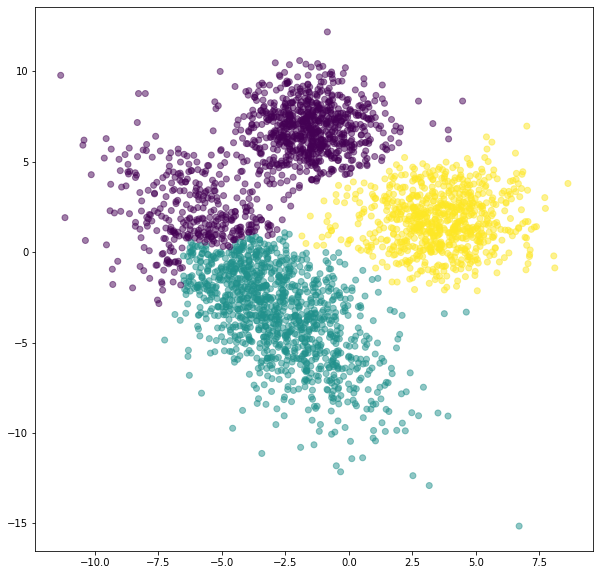

In [12]:
y_pred = ag.labels_

plt.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.5)
plt.show()

## Задание 7.3

При создании модели *AgglomerativeClustering* можно указать матрицу смежности, передав её в параметр `connectivity`. Построить матрицу смежности можно с помощью следующего кода:

In [14]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

В переменной `connectivity` будет хранится матрица смежности для ненаправленного графа на основе датасета.

Обучите модель *AgglomerativeClustering* с параметром `n_clusters=3` и составленной матрицей смежности на признаках исходного датасета.

Посчитайте матрицу смежности, используя приведённый код. Подставьте получившееся значение в параметр `connectivity` при создании объекта *AgglomerativeClustering*.

In [19]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [20]:
ag = AgglomerativeClustering(
    n_clusters=3,
    connectivity=connectivity,
)
ag.fit(X)

AgglomerativeClustering(connectivity=<3000x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 21754 stored elements in Compressed Sparse Row format>,
                        n_clusters=3)

In [21]:
u, counts = np.unique(ag.labels_, return_counts=True)

for count in counts:
    print(count, end=' ')

1486 746 768 

## Задание 7.4

Постройте дендрограмму с помощью пакета *scipy*:

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [125.0, 125.0, 150.0, 150.0],
  [102.5, 102.5, 137.5, 137.5],
  [80.0, 80.0, 120.0, 120.0],
  [50.0, 50.0, 100.0, 100.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [230.0, 230.0, 252.5, 252.5],
  [210.0, 210.0, 241.25, 241.25],
  [182.5, 182.5, 225.625, 225.625],
  [275.0, 275.0, 285.0, 285.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [280.0, 280.0, 302.5, 302.5],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [355.0, 355.0, 365.0, 365.0],
  [395.0, 395.0, 405.0, 

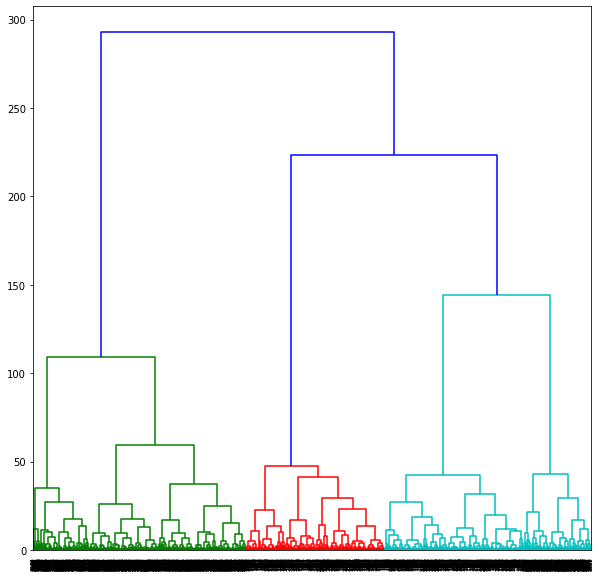

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

# подготовим данные для построения дендрограммы
# ещё один способ выполнить агломеративную кластеризацию
Z = linkage(X, "ward")

# строим дендрограмму
dendrogram(Z, leaf_rotation=90.)

На выходе должно получиться изображение иерархического дерева.

Постройте дендрограмму на исходном наборе данных. Сколько получится кластеров, если граничным расстоянием для разделения кластеров взять 150.

---

Рассмотрим данные, содержащие информацию о составе различных продуктов.

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [27]:
df = pd.read_csv('data/food.txt', sep=' ')
df.head(5)

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


Попробуем построить на них иерархическую кластеризацию:

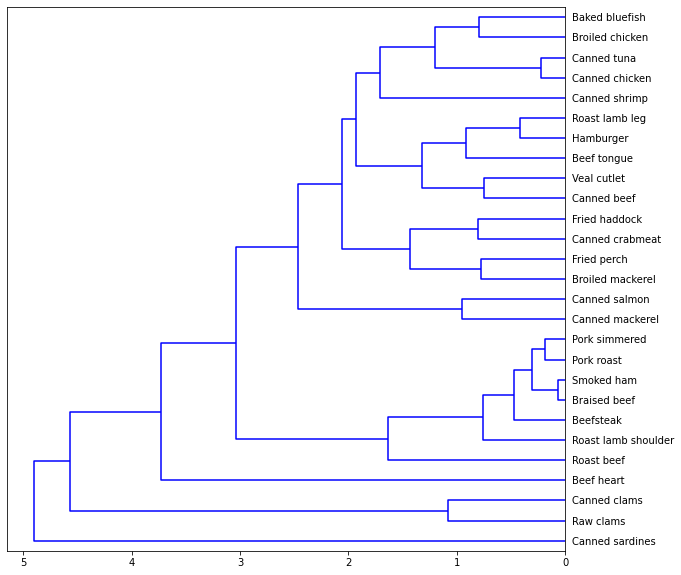

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, method='average', metric='euclidean')
names = df['Name'].values
dend = dendrogram(Z, color_threshold=0, labels=names, orientation='left')

In [38]:
from scipy.cluster.hierarchy import fcluster

t = 2.3
labels = fcluster(Z, t, criterion='distance')

В алгоритме данные нужно нормализовать.

In [36]:
X = df.drop(['Name'], axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [40]:
ag = AgglomerativeClustering()
ag.fit(X)

AgglomerativeClustering()

## Задание 7.6

Сколько всего кластеров получилось для продуктов?

In [45]:
np.unique(labels).shape[0]

6

Введите номер кластера, в который попали продукты с содержанием кальция от 150 до 160.

In [53]:
df['labels'] = labels

In [54]:
df[(df['Calcium'] >= 150) & (df['Calcium'] <= 160)]

,Name,Energy,Protein,Fat,Calcium,Iron,labels
21,Canned mackerel,155,16,9,157,1.8,3
23,Canned salmon,120,17,5,159,0.7,3


Введите номер кластера, в который попал продукт с максимальной жирностью.

In [55]:
df.sort_values('Fat', ascending=False).head(1)

,Name,Energy,Protein,Fat,Calcium,Iron,labels
2,Roast beef,420,15,39,7,2.0,2
